In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import LabelBinarizer

#pd.set_option('display.max_rows', None)

In [2]:
# Read csv file
census_input = pd.read_csv("adult.input")

In [3]:
# Display dataframe
census_input

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,24,Private,176189,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
1,30,Private,161690,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,60,Private,145493,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
3,42,Private,144995,Preschool,1,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,25,United-States,<=50K
4,23,Private,50341,Masters,14,Never-married,Sales,Not-in-family,White,Female,0,0,20,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,198841,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
3996,35,Private,143589,Bachelors,13,Married-spouse-absent,Prof-specialty,Not-in-family,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
3997,36,Private,204590,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,0,213,40,United-States,<=50K
3998,21,Private,143604,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K


In [4]:
census_input.columns

Index(['age', 'type_employer', 'fnlwgt', 'education', 'education_num',
       'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hr_per_week', 'country', 'income'],
      dtype='object')

In [5]:
# Remove fnlwgt, education, and relationship
census_input_subset = census_input [['age', 'type_employer', 'education_num',
       'marital', 'occupation', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hr_per_week', 'country', 'income']]
census_input_subset

,age,type_employer,education_num,marital,occupation,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,24,Private,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,<=50K
1,30,Private,11,Never-married,Prof-specialty,White,Female,0,0,40,United-States,<=50K
2,60,Private,10,Divorced,Adm-clerical,White,Female,0,0,40,United-States,<=50K
3,42,Private,1,Never-married,Handlers-cleaners,White,Male,0,0,25,United-States,<=50K
4,23,Private,14,Never-married,Sales,White,Female,0,0,20,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,White,Male,0,0,50,United-States,>50K
3996,35,Private,13,Married-spouse-absent,Prof-specialty,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
3997,36,Private,13,Divorced,Prof-specialty,Black,Female,0,213,40,United-States,<=50K
3998,21,Private,9,Never-married,Adm-clerical,White,Female,0,0,40,United-States,<=50K


In [6]:
# Check for missing values
census_input_subset.isna().sum()

age              0
type_employer    0
education_num    0
marital          0
occupation       0
race             0
sex              0
capital_gain     0
capital_loss     0
hr_per_week      0
country          0
income           0
dtype: int64

In [7]:
# Check for data types
census_input_subset.dtypes

age               int64
type_employer    object
education_num     int64
marital          object
occupation       object
race             object
sex              object
capital_gain      int64
capital_loss      int64
hr_per_week       int64
country          object
income           object
dtype: object

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education_num'}>],
       [<AxesSubplot:title={'center':'capital_gain'}>,
        <AxesSubplot:title={'center':'capital_loss'}>],
       [<AxesSubplot:title={'center':'hr_per_week'}>, <AxesSubplot:>]],
      dtype=object)

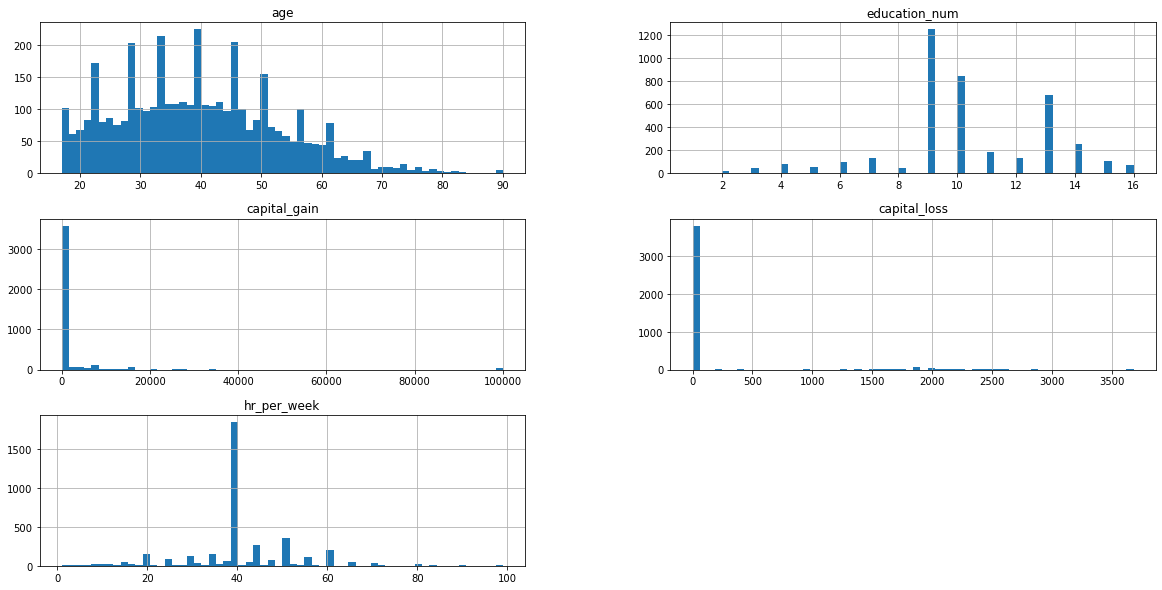

In [8]:
# Display histograms to explore data
census_input_subset.hist(bins=60, figsize=(20,10))

In [9]:
census_input_subset['education_num'].value_counts()

9     1253
10     843
13     680
14     255
11     187
12     134
7      129
15     108
6       95
4       76
16      74
5       52
3       45
8       42
2       23
1        4
Name: education_num, dtype: int64

In [10]:
# Binarization of capital_gain and capital losses
#cg = census_input_subset.iloc[:, 7].values
#cg = census_input_subset['capital_gain'].values
#cg = cg.reshape (1, -1)

#cl = census_input_subset.iloc[:, 8].values
#cl = census_input_subset['capital_loss'].values
#cl = cl.reshape (1, -1)

# capital-gain (yes:>0, no:=0) threshold=1
#cg_bin = Binarizer(threshold = 1)
# capital-loss (yes:>0, no:=0) threshold=1
#cl_bin = Binarizer(threshold = 1)

#capitalGain = cg_bin.fit_transform(cg)
#capitalLoss = cg_bin.fit_transform(cl)
#print(capitalGain)
#print(capitalLoss)
#x=cg_bin.fit_transform(cg)
#print(cg_bin.fit_transform(cl))
#print(x)


In [11]:
census_input_sub = census_input_subset [['age', 'type_employer', 'education_num',
       'marital', 'occupation', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hr_per_week', 'country', 'income']]
census_input_sub

,age,type_employer,education_num,marital,occupation,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,24,Private,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,<=50K
1,30,Private,11,Never-married,Prof-specialty,White,Female,0,0,40,United-States,<=50K
2,60,Private,10,Divorced,Adm-clerical,White,Female,0,0,40,United-States,<=50K
3,42,Private,1,Never-married,Handlers-cleaners,White,Male,0,0,25,United-States,<=50K
4,23,Private,14,Never-married,Sales,White,Female,0,0,20,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,White,Male,0,0,50,United-States,>50K
3996,35,Private,13,Married-spouse-absent,Prof-specialty,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
3997,36,Private,13,Divorced,Prof-specialty,Black,Female,0,213,40,United-States,<=50K
3998,21,Private,9,Never-married,Adm-clerical,White,Female,0,0,40,United-States,<=50K


In [12]:
# Binarize capital_gain
census_input_sub['capital_gain_bin'] = census_input_sub['capital_gain'].astype('bool')
print(census_input_sub['capital_gain_bin'])
print(census_input_sub['capital_gain'])

0       False
1       False
2       False
3       False
4       False
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Name: capital_gain_bin, Length: 4000, dtype: bool
0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    0
3997    0
3998    0
3999    0
Name: capital_gain, Length: 4000, dtype: int64


In [13]:
# Binarize capital_loss
census_input_sub['capital_loss_bin'] = census_input_sub['capital_loss'].astype('bool')
print(census_input_sub['capital_loss_bin'])
print(census_input_sub['capital_loss'])
census_input_sub['capital_loss_bin'].value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
3995    False
3996    False
3997     True
3998    False
3999    False
Name: capital_loss_bin, Length: 4000, dtype: bool
0         0
1         0
2         0
3         0
4         0
       ... 
3995      0
3996      0
3997    213
3998      0
3999      0
Name: capital_loss, Length: 4000, dtype: int64


False    3788
True      212
Name: capital_loss_bin, dtype: int64

In [14]:
census_input_sub['capital_gain_bin'].value_counts()


False    3568
True      432
Name: capital_gain_bin, dtype: int64

In [15]:
census_input_sub


,age,type_employer,education_num,marital,occupation,race,sex,capital_gain,capital_loss,hr_per_week,country,income,capital_gain_bin,capital_loss_bin
0,24,Private,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,<=50K,False,False
1,30,Private,11,Never-married,Prof-specialty,White,Female,0,0,40,United-States,<=50K,False,False
2,60,Private,10,Divorced,Adm-clerical,White,Female,0,0,40,United-States,<=50K,False,False
3,42,Private,1,Never-married,Handlers-cleaners,White,Male,0,0,25,United-States,<=50K,False,False
4,23,Private,14,Never-married,Sales,White,Female,0,0,20,United-States,<=50K,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,White,Male,0,0,50,United-States,>50K,False,False
3996,35,Private,13,Married-spouse-absent,Prof-specialty,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K,False,False
3997,36,Private,13,Divorced,Prof-specialty,Black,Female,0,213,40,United-States,<=50K,False,True
3998,21,Private,9,Never-married,Adm-clerical,White,Female,0,0,40,United-States,<=50K,False,False


In [16]:
# Factorize country
countries = pd.get_dummies(census_input_sub['country'])
countries

,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# Assign the value 1 for United State
United_States = countries['United-States']
print(United_States)

0       1
1       1
2       1
3       1
4       1
       ..
3995    1
3996    0
3997    1
3998    1
3999    1
Name: United-States, Length: 4000, dtype: uint8


In [18]:
# Create a new column for binarized country where 1 is for United States and 0 for other
census_input_sub['country_bin'] = United_States
census_input_sub

,age,type_employer,education_num,marital,occupation,race,sex,capital_gain,capital_loss,hr_per_week,country,income,capital_gain_bin,capital_loss_bin,country_bin
0,24,Private,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,<=50K,False,False,1
1,30,Private,11,Never-married,Prof-specialty,White,Female,0,0,40,United-States,<=50K,False,False,1
2,60,Private,10,Divorced,Adm-clerical,White,Female,0,0,40,United-States,<=50K,False,False,1
3,42,Private,1,Never-married,Handlers-cleaners,White,Male,0,0,25,United-States,<=50K,False,False,1
4,23,Private,14,Never-married,Sales,White,Female,0,0,20,United-States,<=50K,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,White,Male,0,0,50,United-States,>50K,False,False,1
3996,35,Private,13,Married-spouse-absent,Prof-specialty,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K,False,False,0
3997,36,Private,13,Divorced,Prof-specialty,Black,Female,0,213,40,United-States,<=50K,False,True,1
3998,21,Private,9,Never-married,Adm-clerical,White,Female,0,0,40,United-States,<=50K,False,False,1


In [20]:
# Factorize sex and assing the value 1 for female
sex = pd.get_dummies(census_input_sub['sex'])
female = sex['Female']

# Create a new column for binarized sex where female is 1 and males is 0
census_input_sub['sex_bin'] = female

In [22]:
# Discretize age into 4 different bins
bins = [0, 25, 45, 65, 90]
census_input_sub['age_dis'] = pd.cut(census_input_sub['age'], bins, labels = ['young', 'adult', 'senior', 'old'], include_lowest = True)

print(census_input_sub['age'])
print(census_input_sub['age_dis'])

0       24
1       30
2       60
3       42
4       23
        ..
3995    35
3996    35
3997    36
3998    21
3999    50
Name: age, Length: 4000, dtype: int64
0        young
1        adult
2       senior
3        adult
4        young
         ...  
3995     adult
3996     adult
3997     adult
3998     young
3999    senior
Name: age_dis, Length: 4000, dtype: category
Categories (4, object): ['young' < 'adult' < 'senior' < 'old']


In [24]:
# Convert age into asymetric binary attributes
age = pd.get_dummies(census_input_sub['age_dis'])
age


,young,adult,senior,old
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
3995,0,1,0,0
3996,0,1,0,0
3997,0,1,0,0
3998,1,0,0,0


In [25]:
# Create a new column for discretized age and drop the old column for age
census_input_sub = pd.concat([census_input_sub.drop(['age_dis'],axis=1), age],axis=1)

In [26]:
bins = [0, 39, 40, 70]
census_input_sub['hr_per_week_dis'] = pd.cut(census_input_sub['hr_per_week'], bins, labels = ['part-time', 'full-time', 'over-time'], include_lowest = True)

print(census_input_sub['hr_per_week'])
print(census_input_sub['hr_per_week_dis'])

0       40
1       40
2       40
3       25
4       20
        ..
3995    50
3996    40
3997    40
3998    40
3999    32
Name: hr_per_week, Length: 4000, dtype: int64
0       full-time
1       full-time
2       full-time
3       part-time
4       part-time
          ...    
3995    over-time
3996    full-time
3997    full-time
3998    full-time
3999    part-time
Name: hr_per_week_dis, Length: 4000, dtype: category
Categories (3, object): ['part-time' < 'full-time' < 'over-time']


In [27]:
# Discretize hr_per_week into 3 different bins
hr_per_week = pd.get_dummies(census_input_sub['hr_per_week_dis'])
hr_per_week

,part-time,full-time,over-time
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
3995,0,0,1
3996,0,1,0
3997,0,1,0
3998,0,1,0


In [28]:
# Create a new column for discretized hr_per_week and drop the old column for hr_per_week
census_input_sub = pd.concat([census_input_sub.drop(['hr_per_week_dis'],axis=1), hr_per_week],axis=1)

In [29]:
# Check for possible valus for race
census_input_sub['race'].value_counts()

White                 3452
Black                  344
Asian-Pac-Islander     139
Amer-Indian-Eskimo      39
Other                   26
Name: race, dtype: int64

In [30]:
# Factorize race to convert it into asymetric binary attributes
race = pd.get_dummies(census_input_sub['race'])
race

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
3995,0,0,0,0,1
3996,0,1,0,0,0
3997,0,0,1,0,0
3998,0,0,0,0,1


In [31]:
# Create a new columns race and drop the old categorical column
census_input_sub = pd.concat([census_input_sub.drop(['race'],axis=1), race],axis=1)

In [32]:
census_input_sub

,age,type_employer,education_num,marital,occupation,sex,capital_gain,capital_loss,hr_per_week,country,...,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,24,Private,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,United-States,...,0,0,0,1,0,0,0,0,0,1
1,30,Private,11,Never-married,Prof-specialty,Female,0,0,40,United-States,...,0,0,0,1,0,0,0,0,0,1
2,60,Private,10,Divorced,Adm-clerical,Female,0,0,40,United-States,...,1,0,0,1,0,0,0,0,0,1
3,42,Private,1,Never-married,Handlers-cleaners,Male,0,0,25,United-States,...,0,0,1,0,0,0,0,0,0,1
4,23,Private,14,Never-married,Sales,Female,0,0,20,United-States,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Male,0,0,50,United-States,...,0,0,0,0,1,0,0,0,0,1
3996,35,Private,13,Married-spouse-absent,Prof-specialty,Female,0,0,40,Philippines,...,0,0,0,1,0,0,1,0,0,0
3997,36,Private,13,Divorced,Prof-specialty,Female,0,213,40,United-States,...,0,0,0,1,0,0,0,1,0,0
3998,21,Private,9,Never-married,Adm-clerical,Female,0,0,40,United-States,...,0,0,0,1,0,0,0,0,0,1


In [34]:
# creating a blank series
Not_married = pd.Series(['int32'])
 
# running a for loop and assigning some values to series
for i in range(len(census_input_sub)):
    if census_input_sub["marital"][i] == "Married-spouse-absent":
        Not_married[i] = 1
 
    elif census_input_sub["marital"][i] == "Separated":
        Not_married[i] = 1
 
    elif census_input_sub["marital"][i] == "Divorced":
        Not_married[i] = 1
        
    elif census_input_sub["marital"][i] == "Widowed":
        Not_married[i]= 1
 
    else:
        Not_married[i] = 0
         
# inserting new column with values of list made above       
census_input_sub.insert(2, "not-married", Not_married)
 
# list output
census_input_sub

,age,type_employer,not-married,education_num,marital,occupation,sex,capital_gain,capital_loss,hr_per_week,...,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,24,Private,0,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,...,0,0,0,1,0,0,0,0,0,1
1,30,Private,0,11,Never-married,Prof-specialty,Female,0,0,40,...,0,0,0,1,0,0,0,0,0,1
2,60,Private,1,10,Divorced,Adm-clerical,Female,0,0,40,...,1,0,0,1,0,0,0,0,0,1
3,42,Private,0,1,Never-married,Handlers-cleaners,Male,0,0,25,...,0,0,1,0,0,0,0,0,0,1
4,23,Private,0,14,Never-married,Sales,Female,0,0,20,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,0,15,Married-civ-spouse,Prof-specialty,Male,0,0,50,...,0,0,0,0,1,0,0,0,0,1
3996,35,Private,1,13,Married-spouse-absent,Prof-specialty,Female,0,0,40,...,0,0,0,1,0,0,1,0,0,0
3997,36,Private,1,13,Divorced,Prof-specialty,Female,0,213,40,...,0,0,0,1,0,0,0,1,0,0
3998,21,Private,0,9,Never-married,Adm-clerical,Female,0,0,40,...,0,0,0,1,0,0,0,0,0,1


In [35]:
# creating a blank series
Married = pd.Series(['int32'])
 
# running a for loop and assigning some values to series
for i in range(len(census_input_sub)):
    if census_input_sub["marital"][i] == "Married-AF-spouse":
        Married[i] = 1
 
    elif census_input_sub["marital"][i] == "Married-civ-spouse":
        Married[i] = 1
 
    else:
        Married[i] = 0
         
# inserting new column with values of list made above       
census_input_sub.insert(2, "married", Married)
 
# list output
census_input_sub

,age,type_employer,married,not-married,education_num,marital,occupation,sex,capital_gain,capital_loss,...,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,24,Private,1,0,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,...,0,0,0,1,0,0,0,0,0,1
1,30,Private,0,0,11,Never-married,Prof-specialty,Female,0,0,...,0,0,0,1,0,0,0,0,0,1
2,60,Private,0,1,10,Divorced,Adm-clerical,Female,0,0,...,1,0,0,1,0,0,0,0,0,1
3,42,Private,0,0,1,Never-married,Handlers-cleaners,Male,0,0,...,0,0,1,0,0,0,0,0,0,1
4,23,Private,0,0,14,Never-married,Sales,Female,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,1,0,15,Married-civ-spouse,Prof-specialty,Male,0,0,...,0,0,0,0,1,0,0,0,0,1
3996,35,Private,0,1,13,Married-spouse-absent,Prof-specialty,Female,0,0,...,0,0,0,1,0,0,1,0,0,0
3997,36,Private,0,1,13,Divorced,Prof-specialty,Female,0,213,...,0,0,0,1,0,0,0,1,0,0
3998,21,Private,0,0,9,Never-married,Adm-clerical,Female,0,0,...,0,0,0,1,0,0,0,0,0,1


In [36]:
# creating a blank series
Never_married = pd.Series(['int32'])
 
# running a for loop and assigning some values to series
for i in range(len(census_input_sub)):
    if census_input_sub["marital"][i] == "Never-married":
        Never_married[i] = 1
 
    else:
        Never_married[i] = 0
         
# inserting new column with values of list made above       
census_input_sub.insert(2, "never_married", Never_married)
 
# list output
census_input_sub

,age,type_employer,never_married,married,not-married,education_num,marital,occupation,sex,capital_gain,...,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,24,Private,0,1,0,9,Married-civ-spouse,Machine-op-inspct,Male,0,...,0,0,0,1,0,0,0,0,0,1
1,30,Private,1,0,0,11,Never-married,Prof-specialty,Female,0,...,0,0,0,1,0,0,0,0,0,1
2,60,Private,0,0,1,10,Divorced,Adm-clerical,Female,0,...,1,0,0,1,0,0,0,0,0,1
3,42,Private,1,0,0,1,Never-married,Handlers-cleaners,Male,0,...,0,0,1,0,0,0,0,0,0,1
4,23,Private,1,0,0,14,Never-married,Sales,Female,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,0,1,0,15,Married-civ-spouse,Prof-specialty,Male,0,...,0,0,0,0,1,0,0,0,0,1
3996,35,Private,0,0,1,13,Married-spouse-absent,Prof-specialty,Female,0,...,0,0,0,1,0,0,1,0,0,0
3997,36,Private,0,0,1,13,Divorced,Prof-specialty,Female,0,...,0,0,0,1,0,0,0,1,0,0
3998,21,Private,1,0,0,9,Never-married,Adm-clerical,Female,0,...,0,0,0,1,0,0,0,0,0,1


In [37]:
census_input_sub.drop(['capital_gain', 'capital_loss', 'country', 'sex', 'age', 'hr_per_week', 'marital'], axis=1)

,type_employer,never_married,married,not-married,education_num,occupation,income,capital_gain_bin,capital_loss_bin,country_bin,...,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,Private,0,1,0,9,Machine-op-inspct,<=50K,False,False,1,...,0,0,0,1,0,0,0,0,0,1
1,Private,1,0,0,11,Prof-specialty,<=50K,False,False,1,...,0,0,0,1,0,0,0,0,0,1
2,Private,0,0,1,10,Adm-clerical,<=50K,False,False,1,...,1,0,0,1,0,0,0,0,0,1
3,Private,1,0,0,1,Handlers-cleaners,<=50K,False,False,1,...,0,0,1,0,0,0,0,0,0,1
4,Private,1,0,0,14,Sales,<=50K,False,False,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Self-emp-not-inc,0,1,0,15,Prof-specialty,>50K,False,False,1,...,0,0,0,0,1,0,0,0,0,1
3996,Private,0,0,1,13,Prof-specialty,<=50K,False,False,0,...,0,0,0,1,0,0,1,0,0,0
3997,Private,0,0,1,13,Prof-specialty,<=50K,False,True,1,...,0,0,0,1,0,0,0,1,0,0
3998,Private,1,0,0,9,Adm-clerical,<=50K,False,False,1,...,0,0,0,1,0,0,0,0,0,1


In [38]:
# creating a blank series
Gov = pd.Series(['int32'])
 
# running a for loop and assigning some values to series
for i in range(len(census_input_sub)):
    if census_input_sub["type_employer"][i] == "Federal-gov":
        Gov[i] = 1
 
    elif census_input_sub["type_employer"][i] == "Local-gov":
        Gov[i] = 1
 
    elif census_input_sub["type_employer"][i] == "State-gov":
        Gov[i] = 1
 
    else:
        Gov[i] = 0
         
# inserting new column with values of list made above       
census_input_sub.insert(2, "gov", Gov)
 
# list output
census_input_sub

,age,type_employer,gov,never_married,married,not-married,education_num,marital,occupation,sex,...,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,24,Private,0,0,1,0,9,Married-civ-spouse,Machine-op-inspct,Male,...,0,0,0,1,0,0,0,0,0,1
1,30,Private,0,1,0,0,11,Never-married,Prof-specialty,Female,...,0,0,0,1,0,0,0,0,0,1
2,60,Private,0,0,0,1,10,Divorced,Adm-clerical,Female,...,1,0,0,1,0,0,0,0,0,1
3,42,Private,0,1,0,0,1,Never-married,Handlers-cleaners,Male,...,0,0,1,0,0,0,0,0,0,1
4,23,Private,0,1,0,0,14,Never-married,Sales,Female,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,0,0,1,0,15,Married-civ-spouse,Prof-specialty,Male,...,0,0,0,0,1,0,0,0,0,1
3996,35,Private,0,0,0,1,13,Married-spouse-absent,Prof-specialty,Female,...,0,0,0,1,0,0,1,0,0,0
3997,36,Private,0,0,0,1,13,Divorced,Prof-specialty,Female,...,0,0,0,1,0,0,0,1,0,0
3998,21,Private,0,1,0,0,9,Never-married,Adm-clerical,Female,...,0,0,0,1,0,0,0,0,0,1


In [39]:
# creating a blank series
Not_working = pd.Series(['int32'])
 
# running a for loop and assigning some values to series
for i in range(len(census_input_sub)):
    if census_input_sub["type_employer"][i] == "Without-pay":
        Not_working[i] = 1
 
    elif census_input_sub["type_employer"][i] == "Never-worked":
        Not_working[i] = 1
 
    else:
        Not_working[i] = 0
         
# inserting new column with values of list made above       
census_input_sub.insert(2, "not_working", Not_working)
 
# list output
census_input_sub

,age,type_employer,not_working,gov,never_married,married,not-married,education_num,marital,occupation,...,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,24,Private,0,0,0,1,0,9,Married-civ-spouse,Machine-op-inspct,...,0,0,0,1,0,0,0,0,0,1
1,30,Private,0,0,1,0,0,11,Never-married,Prof-specialty,...,0,0,0,1,0,0,0,0,0,1
2,60,Private,0,0,0,0,1,10,Divorced,Adm-clerical,...,1,0,0,1,0,0,0,0,0,1
3,42,Private,0,0,1,0,0,1,Never-married,Handlers-cleaners,...,0,0,1,0,0,0,0,0,0,1
4,23,Private,0,0,1,0,0,14,Never-married,Sales,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,0,0,0,1,0,15,Married-civ-spouse,Prof-specialty,...,0,0,0,0,1,0,0,0,0,1
3996,35,Private,0,0,0,0,1,13,Married-spouse-absent,Prof-specialty,...,0,0,0,1,0,0,1,0,0,0
3997,36,Private,0,0,0,0,1,13,Divorced,Prof-specialty,...,0,0,0,1,0,0,0,1,0,0
3998,21,Private,0,0,1,0,0,9,Never-married,Adm-clerical,...,0,0,0,1,0,0,0,0,0,1


In [40]:
# creating a blank series
Private = pd.Series(['int32'])
 
# running a for loop and assigning some values to series
for i in range(len(census_input_sub)):
    if census_input_sub["type_employer"][i] == "Private":
        Private[i] = 1
 
    else:
        Private[i] = 0
         
# inserting new column with values of list made above       
census_input_sub.insert(2, "private", Private)
 
# list output
census_input_sub

,age,type_employer,private,not_working,gov,never_married,married,not-married,education_num,marital,...,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,24,Private,1,0,0,0,1,0,9,Married-civ-spouse,...,0,0,0,1,0,0,0,0,0,1
1,30,Private,1,0,0,1,0,0,11,Never-married,...,0,0,0,1,0,0,0,0,0,1
2,60,Private,1,0,0,0,0,1,10,Divorced,...,1,0,0,1,0,0,0,0,0,1
3,42,Private,1,0,0,1,0,0,1,Never-married,...,0,0,1,0,0,0,0,0,0,1
4,23,Private,1,0,0,1,0,0,14,Never-married,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,0,0,0,0,1,0,15,Married-civ-spouse,...,0,0,0,0,1,0,0,0,0,1
3996,35,Private,1,0,0,0,0,1,13,Married-spouse-absent,...,0,0,0,1,0,0,1,0,0,0
3997,36,Private,1,0,0,0,0,1,13,Divorced,...,0,0,0,1,0,0,0,1,0,0
3998,21,Private,1,0,0,1,0,0,9,Never-married,...,0,0,0,1,0,0,0,0,0,1


In [41]:
# creating a blank series
Self_employed = pd.Series(['int32'])
 
# running a for loop and assigning some values to series
for i in range(len(census_input_sub)):
    if census_input_sub["type_employer"][i] == "Self-emp-inc":
        Self_employed[i] = 1
 
    elif census_input_sub["type_employer"][i] == "Self-emp-not-inc":
        Self_employed[i] = 1
 
    else:
        Self_employed[i] = 0
         
# inserting new column with values of list made above       
census_input_sub.insert(2, "self_employed", Self_employed)
 
# list output
census_input_sub

,age,type_employer,self_employed,private,not_working,gov,never_married,married,not-married,education_num,...,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,24,Private,0,1,0,0,0,1,0,9,...,0,0,0,1,0,0,0,0,0,1
1,30,Private,0,1,0,0,1,0,0,11,...,0,0,0,1,0,0,0,0,0,1
2,60,Private,0,1,0,0,0,0,1,10,...,1,0,0,1,0,0,0,0,0,1
3,42,Private,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,23,Private,0,1,0,0,1,0,0,14,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,1,0,0,0,0,1,0,15,...,0,0,0,0,1,0,0,0,0,1
3996,35,Private,0,1,0,0,0,0,1,13,...,0,0,0,1,0,0,1,0,0,0
3997,36,Private,0,1,0,0,0,0,1,13,...,0,0,0,1,0,0,0,1,0,0
3998,21,Private,0,1,0,0,1,0,0,9,...,0,0,0,1,0,0,0,0,0,1


In [43]:
# creating a blank series
Other = pd.Series(['int32'])
 
# running a for loop and assigning some values to series
for i in range(len(census_input_sub)):
    if census_input_sub["occupation"][i] == "Tech-support":
        Other[i] = 1
 
    elif census_input_sub["occupation"][i] == "Adm-clerical":
        Other[i] = 1
 
    elif census_input_sub["occupation"][i] == "Priv-house-serv":
        Other[i] = 1
        
    elif census_input_sub["occupation"][i] == "Protective-serv":
        Other[i]= 1
 
    elif census_input_sub["occupation"][i] == "Armed-Forces":
        Other[i]= 1
        
    elif census_input_sub["occupation"][i] == "Other-service":
        Other[i]= 1

    else:
        Other[i] = 0
         
# inserting new column with values of list made above       
census_input_sub.insert(2, "other", Other)
 
# list output
census_input_sub

,age,type_employer,other,self_employed,private,not_working,gov,never_married,married,not-married,...,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,24,Private,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,30,Private,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,60,Private,1,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,42,Private,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,23,Private,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3996,35,Private,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3997,36,Private,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3998,21,Private,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [44]:
# creating a blank series
Exec_managerial = pd.Series(['int32'])
 
# running a for loop and assigning some values to series
for i in range(len(census_input_sub)):
    if census_input_sub["occupation"][i] == "Exec-managerial":
        Exec_managerial[i] = 1
 
    else:
        Exec_managerial[i] = 0
         
# inserting new column with values of list made above       
census_input_sub.insert(2, "exec_managerial", Exec_managerial)
 
# list output
census_input_sub

,age,type_employer,exec_managerial,other,self_employed,private,not_working,gov,never_married,married,...,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,24,Private,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,30,Private,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,60,Private,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,42,Private,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,23,Private,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3996,35,Private,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3997,36,Private,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3998,21,Private,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [45]:
# creating a blank series
Prof_specialty = pd.Series(['int32'])
 
# running a for loop and assigning some values to series
for i in range(len(census_input_sub)):
    if census_input_sub["occupation"][i] == "Prof-specialty":
        Prof_specialty[i] = 1
 
    else:
        Prof_specialty[i] = 0
         
# inserting new column with values of list made above       
census_input_sub.insert(2, "prof_specialty", Prof_specialty)
 
# list output
census_input_sub

,age,type_employer,prof_specialty,exec_managerial,other,self_employed,private,not_working,gov,never_married,...,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,24,Private,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,30,Private,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,60,Private,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,42,Private,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,23,Private,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3996,35,Private,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3997,36,Private,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3998,21,Private,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [46]:
# creating a blank series
Sales = pd.Series(['int32'])
 
# running a for loop and assigning some values to series
for i in range(len(census_input_sub)):
    if census_input_sub["occupation"][i] == "Sales":
        Sales[i] = 1
 
    else:
        Sales[i] = 0
         
# inserting new column with values of list made above       
census_input_sub.insert(2, "sales", Sales)
 
# list output
census_input_sub

,age,type_employer,sales,prof_specialty,exec_managerial,other,self_employed,private,not_working,gov,...,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,24,Private,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,30,Private,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,60,Private,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,42,Private,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,23,Private,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3996,35,Private,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3997,36,Private,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3998,21,Private,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [47]:
# creating a blank series
ManualWork = pd.Series(['int32'])
 
# running a for loop and assigning some values to series
for i in range(len(census_input_sub)):
    if census_input_sub["occupation"][i] == "Craft-repair":
        ManualWork[i] = 1
 
    elif census_input_sub["occupation"][i] == "Farming-fishing":
        ManualWork[i] = 1
 
    elif census_input_sub["occupation"][i] == "Handlers-cleaners":
        ManualWork[i] = 1
        
    elif census_input_sub["occupation"][i] == "Machine-op-inspct":
        ManualWork[i]= 1
 
    elif census_input_sub["occupation"][i] == "Transport-moving":
        ManualWork[i]= 1

    else:
        ManualWork[i] = 0
         
# inserting new column with values of list made above       
census_input_sub.insert(2, "manual_work", ManualWork)
 
# list output
census_input_sub

,age,type_employer,manual_work,sales,prof_specialty,exec_managerial,other,self_employed,private,not_working,...,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,24,Private,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,30,Private,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,60,Private,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,42,Private,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,23,Private,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3996,35,Private,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3997,36,Private,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3998,21,Private,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [48]:
# Display dataframe with all columns
pd.set_option('display.max_columns', None)

In [49]:
# Factorize income
income = pd.get_dummies(census_input_sub['income'])
income

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3995,0,1
3996,1,0
3997,1,0
3998,1,0


In [50]:
# Assign the value 1 for income over 50K
over50k = income['>50K']
print(over50k)

0       0
1       0
2       0
3       0
4       0
       ..
3995    1
3996    0
3997    0
3998    0
3999    0
Name: >50K, Length: 4000, dtype: uint8


In [51]:
# Merge values in one binarized new income column where 1 is assigned for incomes over 50K
census_input_sub['income'] = over50k
census_input_sub

,age,type_employer,manual_work,sales,prof_specialty,exec_managerial,other,self_employed,private,not_working,gov,never_married,married,not-married,education_num,marital,occupation,sex,capital_gain,capital_loss,hr_per_week,country,income,capital_gain_bin,capital_loss_bin,country_bin,sex_bin,young,adult,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,24,Private,1,0,0,0,0,0,1,0,0,0,1,0,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,United-States,0,False,False,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,30,Private,0,0,1,0,0,0,1,0,0,1,0,0,11,Never-married,Prof-specialty,Female,0,0,40,United-States,0,False,False,1,1,0,1,0,0,0,1,0,0,0,0,0,1
2,60,Private,0,0,0,0,1,0,1,0,0,0,0,1,10,Divorced,Adm-clerical,Female,0,0,40,United-States,0,False,False,1,1,0,0,1,0,0,1,0,0,0,0,0,1
3,42,Private,1,0,0,0,0,0,1,0,0,1,0,0,1,Never-married,Handlers-cleaners,Male,0,0,25,United-States,0,False,False,1,0,0,1,0,0,1,0,0,0,0,0,0,1
4,23,Private,0,1,0,0,0,0,1,0,0,1,0,0,14,Never-married,Sales,Female,0,0,20,United-States,0,False,False,1,1,1,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,0,0,1,0,0,1,0,0,0,0,1,0,15,Married-civ-spouse,Prof-specialty,Male,0,0,50,United-States,1,False,False,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3996,35,Private,0,0,1,0,0,0,1,0,0,0,0,1,13,Married-spouse-absent,Prof-specialty,Female,0,0,40,Philippines,0,False,False,0,1,0,1,0,0,0,1,0,0,1,0,0,0
3997,36,Private,0,0,1,0,0,0,1,0,0,0,0,1,13,Divorced,Prof-specialty,Female,0,213,40,United-States,0,False,True,1,1,0,1,0,0,0,1,0,0,0,1,0,0
3998,21,Private,0,0,0,0,1,0,1,0,0,1,0,0,9,Never-married,Adm-clerical,Female,0,0,40,United-States,0,False,False,1,1,1,0,0,0,0,1,0,0,0,0,0,1


In [52]:
# Factorize education_num in order to convert it into asymetric binary attributes
education_num = pd.get_dummies(census_input_sub['education_num'])
education_num

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3996,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
# Concatenate new attributes into the dataframe and drop the old numerical attribute
census_input_sub = pd.concat([census_input_sub.drop(['education_num'],axis=1), education_num],axis=1)

In [54]:
census_input_sub

,age,type_employer,manual_work,sales,prof_specialty,exec_managerial,other,self_employed,private,not_working,gov,never_married,married,not-married,marital,occupation,sex,capital_gain,capital_loss,hr_per_week,country,income,capital_gain_bin,capital_loss_bin,country_bin,sex_bin,young,adult,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,24,Private,1,0,0,0,0,0,1,0,0,0,1,0,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,United-States,0,False,False,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,30,Private,0,0,1,0,0,0,1,0,0,1,0,0,Never-married,Prof-specialty,Female,0,0,40,United-States,0,False,False,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,60,Private,0,0,0,0,1,0,1,0,0,0,0,1,Divorced,Adm-clerical,Female,0,0,40,United-States,0,False,False,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,42,Private,1,0,0,0,0,0,1,0,0,1,0,0,Never-married,Handlers-cleaners,Male,0,0,25,United-States,0,False,False,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23,Private,0,1,0,0,0,0,1,0,0,1,0,0,Never-married,Sales,Female,0,0,20,United-States,0,False,False,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,0,0,1,0,0,1,0,0,0,0,1,0,Married-civ-spouse,Prof-specialty,Male,0,0,50,United-States,1,False,False,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3996,35,Private,0,0,1,0,0,0,1,0,0,0,0,1,Married-spouse-absent,Prof-specialty,Female,0,0,40,Philippines,0,False,False,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3997,36,Private,0,0,1,0,0,0,1,0,0,0,0,1,Divorced,Prof-specialty,Female,0,213,40,United-States,0,False,True,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3998,21,Private,0,0,0,0,1,0,1,0,0,1,0,0,Never-married,Adm-clerical,Female,0,0,40,United-States,0,False,False,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [55]:
# shift column 'income' to last position
last_column = census_input_sub.pop('income')
  
# insert column using insert(position, column_name, last_column) function
census_input_sub.insert(53, 'income', last_column)

census_input_sub

,age,type_employer,manual_work,sales,prof_specialty,exec_managerial,other,self_employed,private,not_working,gov,never_married,married,not-married,marital,occupation,sex,capital_gain,capital_loss,hr_per_week,country,capital_gain_bin,capital_loss_bin,country_bin,sex_bin,young,adult,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,income
0,24,Private,1,0,0,0,0,0,1,0,0,0,1,0,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,United-States,False,False,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,30,Private,0,0,1,0,0,0,1,0,0,1,0,0,Never-married,Prof-specialty,Female,0,0,40,United-States,False,False,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,Private,0,0,0,0,1,0,1,0,0,0,0,1,Divorced,Adm-clerical,Female,0,0,40,United-States,False,False,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,42,Private,1,0,0,0,0,0,1,0,0,1,0,0,Never-married,Handlers-cleaners,Male,0,0,25,United-States,False,False,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23,Private,0,1,0,0,0,0,1,0,0,1,0,0,Never-married,Sales,Female,0,0,20,United-States,False,False,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,35,Self-emp-not-inc,0,0,1,0,0,1,0,0,0,0,1,0,Married-civ-spouse,Prof-specialty,Male,0,0,50,United-States,False,False,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3996,35,Private,0,0,1,0,0,0,1,0,0,0,0,1,Married-spouse-absent,Prof-specialty,Female,0,0,40,Philippines,False,False,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3997,36,Private,0,0,1,0,0,0,1,0,0,0,0,1,Divorced,Prof-specialty,Female,0,213,40,United-States,False,True,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3998,21,Private,0,0,0,0,1,0,1,0,0,1,0,0,Never-married,Adm-clerical,Female,0,0,40,United-States,False,False,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [56]:
# Drop unnecessary categorical columns
census_input_s = census_input_sub.drop(['capital_gain', 'capital_loss', 'country', 'sex', 'age', 'hr_per_week', 'marital', 'type_employer','occupation'], axis=1)
census_input_s

,manual_work,sales,prof_specialty,exec_managerial,other,self_employed,private,not_working,gov,never_married,married,not-married,capital_gain_bin,capital_loss_bin,country_bin,sex_bin,young,adult,senior,old,part-time,full-time,over-time,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,income
0,1,0,0,0,0,0,1,0,0,0,1,0,False,False,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,1,0,0,False,False,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,0,1,False,False,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,1,0,0,False,False,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,1,0,0,False,False,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,1,0,0,1,0,0,0,0,1,0,False,False,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3996,0,0,1,0,0,0,1,0,0,0,0,1,False,False,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3997,0,0,1,0,0,0,1,0,0,0,0,1,False,True,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3998,0,0,0,0,1,0,1,0,0,1,0,0,False,False,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [57]:
# Get dataframe size and dimentionality
shape = census_input_s.shape 


# printing size and dimentionality
print("Input data: {}".format(shape))

Input data: (4000, 45)


In [58]:
# Reorder columns
#column_order = ['young', 'adult', 'senior', 'old',  'gov', 'not_working', 'private', 'self_employed', 1, 2, 3, 
                #4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,'married', 'never_married','not-married', 
                #'exec_managerial', 'prof_specialty', 'other','manual_work', 'sales', 'Black', 'White', 
                #'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Other', 'sex_bin', 'capital_gain_bin', 
                #'capital_loss_bin', 'part-time', 'full-time', 'over-time', 'country_bin', 'income']
#census_input_s = census_input_s.reindex(columns=column_order)

In [60]:
# Export cleaned and filtered dataframe
census_input_s.to_csv('adult.input-filtered.csv')